# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
import requests
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "d67a24e8fcf309b637a21c2b7235518e"  # Replace with your actual API key

# Define an empty list to store the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    city_name = city["city_name"]
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city_name}&appid={api_key}&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city_name}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the city information into city_data list
        city_data.append({
            "City": city_name,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except KeyError:
        print(f"{city_name} not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | London
Processing Record 2 of Set 1 | New York
Processing Record 3 of Set 1 | Tokyo
-----------------------------
Data Retrieval Complete
-----------------------------


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          3
Lat           3
Lng           3
Max Temp      3
Humidity      3
Cloudiness    3
Wind Speed    3
Country       3
Date          3
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.5085,-0.1257,8.60,80,100,0.45,GB,1731641704
1,New York,40.7143,-74.0060,6.71,57,0,2.57,US,1731642303
2,Tokyo,35.6895,139.6917,16.39,82,75,3.60,JP,1731642198


In [18]:
# Display the city_data into a csv

city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

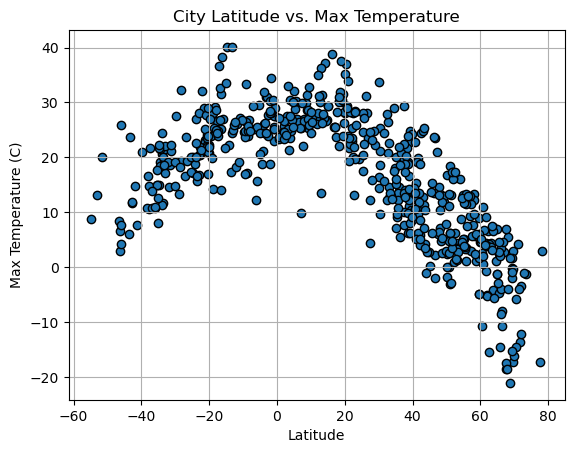

<Figure size 640x480 with 0 Axes>

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.show()

# Incorporate the other graph properties







# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

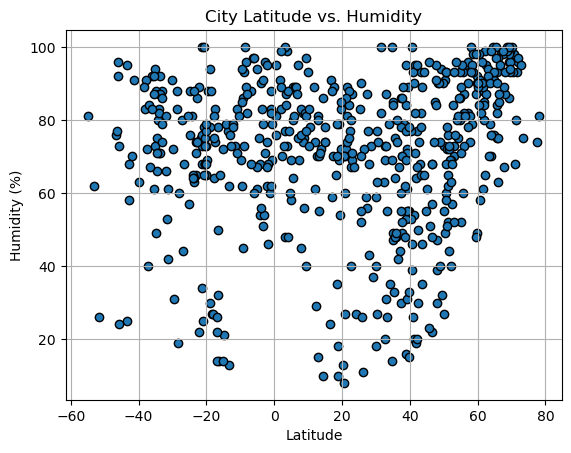

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")
plt.title("City Latitude vs. Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

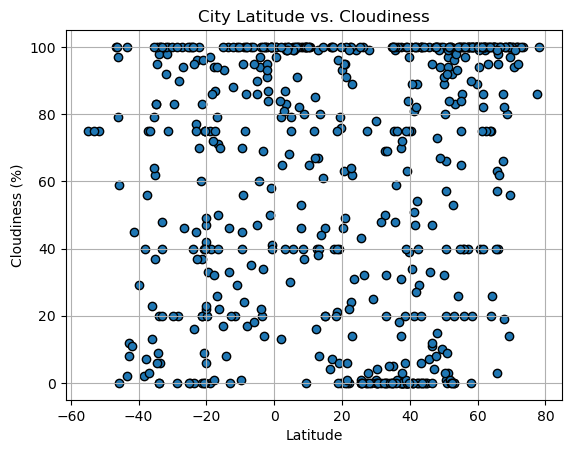

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")
plt.title("City Latitude vs. Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

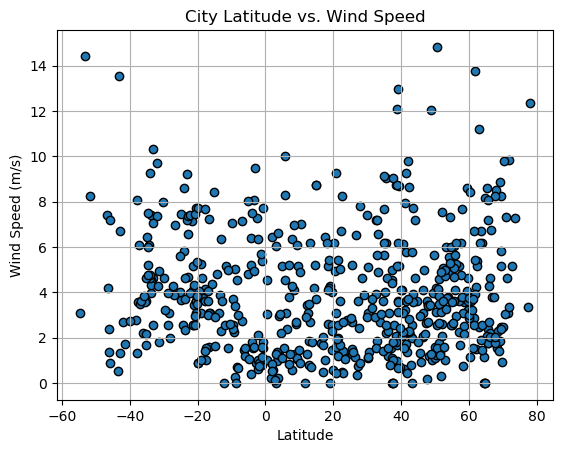

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")
plt.title("City Latitude vs. Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_position):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_position, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    print(f"r-squared: {rvalue**2:.3f}")
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

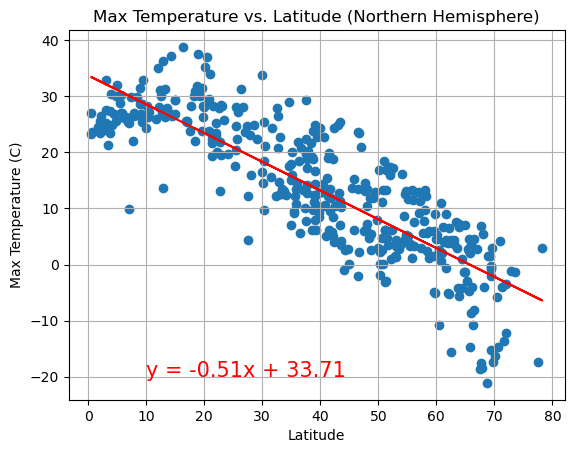

The r-squared value is: 0.7161472181434125


In [32]:
# Linear regression on Northern Hemisphere
from scipy.stats import linregress


latitudes = northern_hemi_df["Lat"]
max_temps = northern_hemi_df["Max Temp"]


(slope, intercept, r_value, p_value, std_err) = linregress(latitudes, max_temps)


regress_values = slope * latitudes + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"


plt.scatter(latitudes, max_temps)
plt.plot(latitudes, regress_values, "r-")
plt.annotate(line_eq, (10, -20), fontsize=15, color="red")
plt.title("Max Temperature vs. Latitude (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.show()

print(f"The r-squared value is: {r_value**2}")


The r^2-value is: 0.4121057168607252


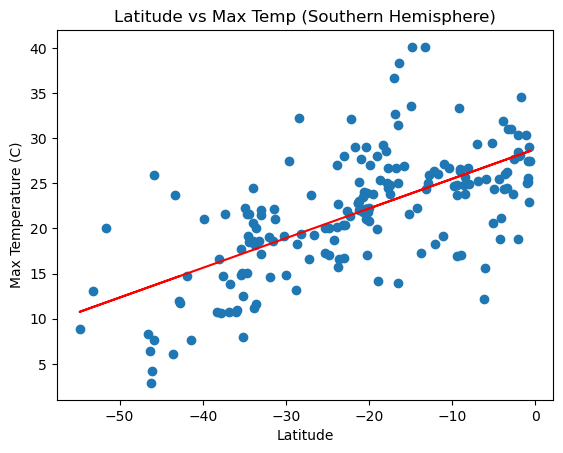

In [31]:

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)


regression_line = slope * x_values + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line, color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs Max Temp (Southern Hemisphere)")


print(f"The r^2-value is: {r_value**2}")


plt.show()


**Discussion about the linear relationship:** The scatter plot shows a positive correlation between latitude and maximum temperature in the Southern Hemisphere, meaning temperatures generally increase as cities are closer to the equator. The r^2 -value of 0.41 suggests a moderate relationship, with other factors likely affecting temperature beyond latitude alone.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.05689741545789608


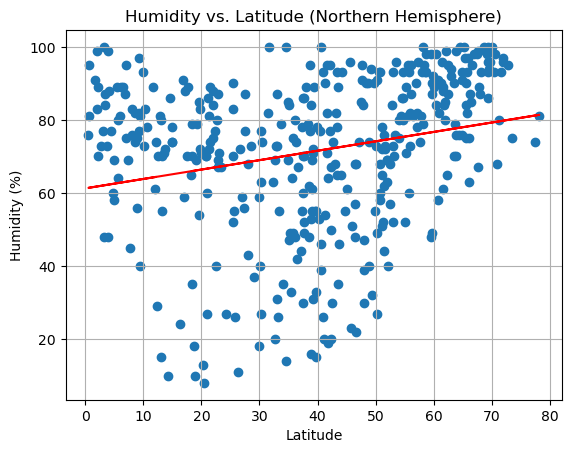

In [35]:
# Northern Hemisphere

from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude (Northern Hemisphere)")
plt.grid(True)

print(f"The r^2 value is: {r_value**2}")

# Show the plot
plt.show()


The r^2 value is: 0.0002808747046324618


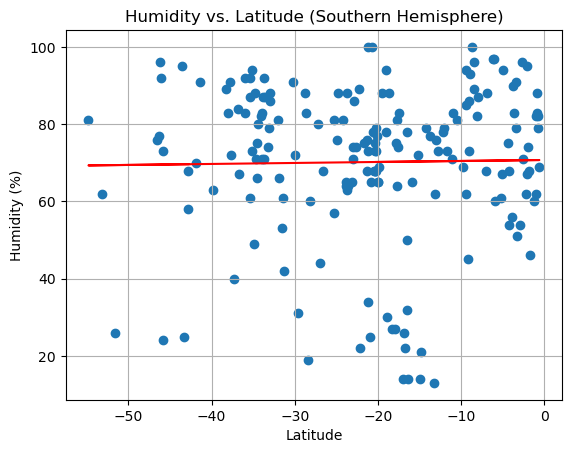

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude (Southern Hemisphere)")
plt.grid(True)

# Display r^2 value
print(f"The r^2 value is: {r_value**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere: The plot shows a slight positive trend between latitude and humidity, but the low r^2 value (0.057) indicates that latitude does not strongly predict humidity levels. The relationship is weak and may not be significant.

Southern Hemisphere: The plot shows an almost flat trend line, indicating no meaningful relationship between latitude and humidity. The trend is minimal, suggesting that other factors likely influence humidity more than latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

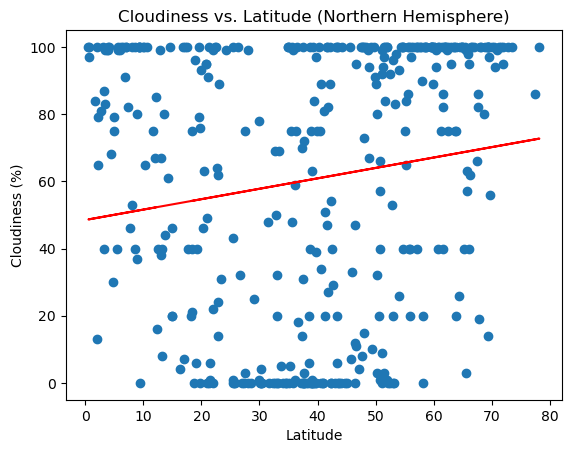

The r^2 value is: 0.024026517125811043


In [39]:
# Northern Hemisphere

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress




northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]


x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']


slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regression_line = slope * x_values + intercept

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude (Northern Hemisphere)")
plt.show()

# Print the R-squared value
print(f"The r^2 value is: {r_value**2}")



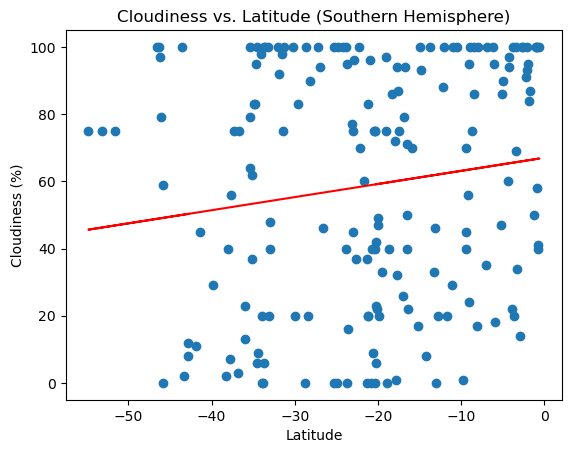

The r^2 value is: 0.020567354299943663


In [40]:
# Southern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]


x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']


slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)


regression_line = slope * x_values + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude (Southern Hemisphere)")
plt.show()

# Print the R-squared value
print(f"The r^2 value is: {r_value**2}")


**Discussion about the linear relationship:** The linear relationship between cloudiness and latitude is weak for both hemispheres, as indicated by the very low 
R values. This means latitude has little to no effect on cloudiness in the data analyzed, as the points are widely dispersed with no clear trend.

### Wind Speed vs. Latitude Linear Regression Plot

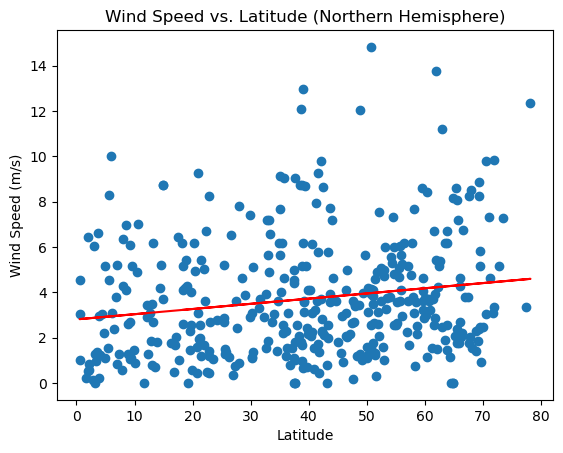

The r^2 value is: 0.030396762354449484


In [41]:
# Northern Hemisphere

import matplotlib.pyplot as plt
from scipy.stats import linregress


x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']


slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)


regression_line = slope * x_values + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude (Northern Hemisphere)")
plt.show()

# Print the r-squared value
print(f"The r^2 value is: {r_value**2}")


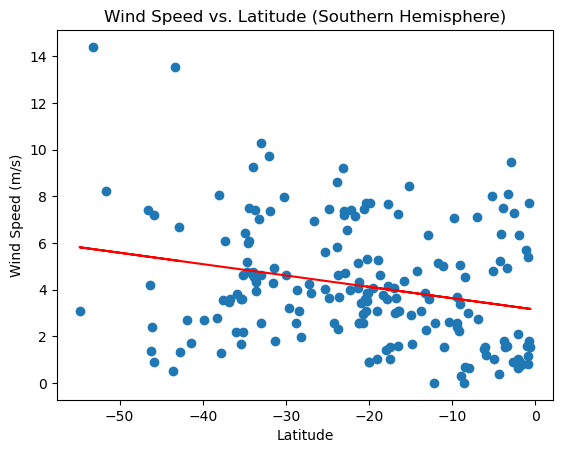

The r^2 value is: 0.06223904070051575


In [42]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']


slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)


regression_line = slope * x_values + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values, regression_line, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs. Latitude (Southern Hemisphere)")
plt.show()

# Print the r-squared value
print(f"The r^2 value is: {r_value**2}")


**Discussion about the linear relationship:** Northern Hemisphere: Weak positive correlation with R value = 0.03, suggesting little impact of latitude on wind speed.

Southern Hemisphere: Weak negative correlation with R value = 0.06, also indicating minimal effect of latitude on wind speed.

Overall, latitude has a very limited effect on wind speed in both hemispheres.